In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score

# run pip install to access UCI ML repo
! pip install ucimlrepo

# data
from ucimlrepo import fetch_ucirepo

forest_fires = fetch_ucirepo(id=162)
X = forest_fires.data.features.copy()
y = forest_fires.data.targets.copy()

# display dataset structure
print(X.info())
print(X.describe())
print(y.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
dtypes: float64(7), int64(3), object(2)
memory usage: 48.6+ KB
None
                X           Y        FFMC         DMC          DC         ISI  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807   90.644681  110.872340  547.940039    9.021663   
std      2.313778    1.229900    5.520111   64.046482  248.066192 

In [ ]:
# Check nulls in X
print("Nulls in X:")
print(X.isnull().sum())

# Check nulls in y (original and log)
print("\nNulls in y:")
print(y.isnull().sum())

# Duplicate rows in X
print("\nDuplicate rows in X:", X.duplicated().sum())

# Duplicate rows in y
print("Duplicate rows in y:", y.duplicated().sum())

Nulls in X:
X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
dtype: int64

Nulls in y:
area    0
dtype: int64

Duplicate rows in X: 13
Duplicate rows in y: 266


In [ ]:
duplicate_X_all = X[X.duplicated(keep=False)]
print(duplicate_X_all)

     X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain
26   7  4   sep  fri  92.4  117.9  668.0  12.2  19.0  34   5.8   0.0
52   4  3   aug  wed  92.1  111.2  654.1   9.6  20.4  42   4.9   0.0
53   4  3   aug  wed  92.1  111.2  654.1   9.6  20.4  42   4.9   0.0
99   3  4   aug  sun  91.4  142.4  601.4  10.6  19.8  39   5.4   0.0
100  3  4   aug  sun  91.4  142.4  601.4  10.6  19.8  39   5.4   0.0
159  7  4   sep  fri  92.4  117.9  668.0  12.2  19.0  34   5.8   0.0
176  6  5   apr  thu  81.5    9.1   55.2   2.7   5.8  54   5.8   0.0
192  2  2   aug  tue  94.8  108.3  647.1  17.0  24.6  22   4.5   0.0
194  2  2   aug  tue  94.8  108.3  647.1  17.0  24.6  22   4.5   0.0
196  6  5   apr  thu  81.5    9.1   55.2   2.7   5.8  54   5.8   0.0
214  4  4   mar  sat  91.7   35.8   80.8   7.8  17.0  27   4.9   0.0
215  4  4   mar  sat  91.7   35.8   80.8   7.8  17.0  27   4.9   0.0
276  4  4   dec  mon  85.4   25.4  349.7   2.6   4.6  21   8.5   0.0
278  4  4   dec  mon  85.4   25.4 

In [ ]:
# remove fully duplicated rows (X+y together)
combined_df = pd.concat([X, y], axis=1)
combined_df = combined_df.drop_duplicates()

# Split again
X = combined_df.drop(columns=y.columns)
y = combined_df[y.columns]

# Duplicate rows in X
print("\nDuplicate rows in X:", X.duplicated().sum())

# Duplicate rows in y
print("Duplicate rows in y:", y.duplicated().sum())

# display dataset structure
print(X.info())
print(X.describe())
print(y.head())


Duplicate rows in X: 9
Duplicate rows in y: 262
<class 'pandas.core.frame.DataFrame'>
Index: 513 entries, 0 to 516
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       513 non-null    int64  
 1   Y       513 non-null    int64  
 2   month   513 non-null    object 
 3   day     513 non-null    object 
 4   FFMC    513 non-null    float64
 5   DMC     513 non-null    float64
 6   DC      513 non-null    float64
 7   ISI     513 non-null    float64
 8   temp    513 non-null    float64
 9   RH      513 non-null    int64  
 10  wind    513 non-null    float64
 11  rain    513 non-null    float64
dtypes: float64(7), int64(3), object(2)
memory usage: 52.1+ KB
None
                X           Y        FFMC         DMC          DC         ISI  \
count  513.000000  513.000000  513.000000  513.000000  513.000000  513.000000   
mean     4.678363    4.300195   90.637427  110.989279  549.155166    9.023587   
std      2.320059    1

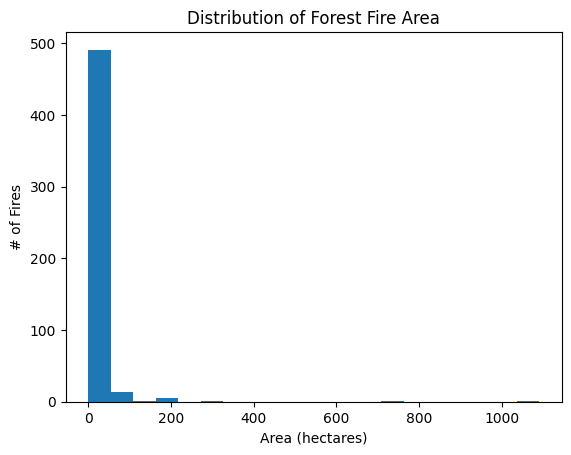

<ipython-input-5-02cc0b5a76c2>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.loc[:, 'log_area'] = np.log1p(y['area'])


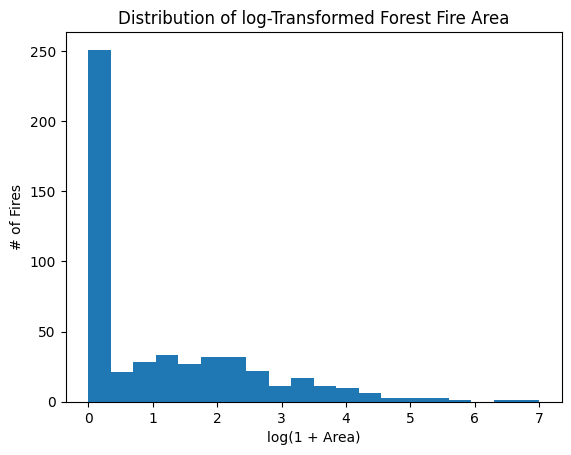

In [ ]:
# visualize y (forest fire area)
# area recorded in hectares (ha) aka 0.01 square km (km^2)

plt.hist(y['area'], bins=20)
plt.title('Distribution of Forest Fire Area')
plt.xlabel('Area (hectares)')
plt.ylabel('# of Fires')
plt.show()

# log1p y since y is so right skewed
# use log1p since log(0) will break
# np.log1p(x) = log(1+x) so log1p(0) = log(1) = 0, compresses large values
# but avoids issues at 0

y.loc[:, 'log_area'] = np.log1p(y['area'])
plt.hist(y['log_area'], bins=20)
plt.title('Distribution of log-Transformed Forest Fire Area')
plt.xlabel('log(1 + Area)')
plt.ylabel('# of Fires')
plt.show()

In [ ]:
# EDA

# explore dataset structure and summary statistics
print(X['X'].head())
print(X['Y'].head())

# X and Y are spatial coordinates, the grid location of each fire observation
# they define a 9x9 grid over the national park
# X: horizontal coordinate (range from 1-9),
# Y: vertical coordinate (range from 2-9)

0    7
1    7
2    7
3    8
4    8
Name: X, dtype: int64
0    5
1    4
2    4
3    6
4    6
Name: Y, dtype: int64


In [ ]:
# explore month and day
print(X['month'].unique())
print(X['day'].unique())

# Create mapping from abbreviated month names to numeric values
month_map = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
    'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
    'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

# Apply mapping to the 'month' column
X.loc[:, 'month'] = X['month'].str.lower().map(month_map)

print(sorted(X['month'].unique()))

# create mapping from abbreviated day names to numeric values
day_map = {
    'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4,
    'fri': 5, 'sat': 6, 'sun': 7
}

# apply mapping to the day column
X.loc[:, 'day'] = X['day'].str.lower().map(day_map)

print(sorted(X['day'].unique()))

['mar' 'oct' 'aug' 'sep' 'apr' 'jun' 'jul' 'feb' 'jan' 'dec' 'may' 'nov']
['fri' 'tue' 'sat' 'sun' 'mon' 'wed' 'thu']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[1, 2, 3, 4, 5, 6, 7]


[3 10 8 9 4 6 7 2 1 12 5 11]


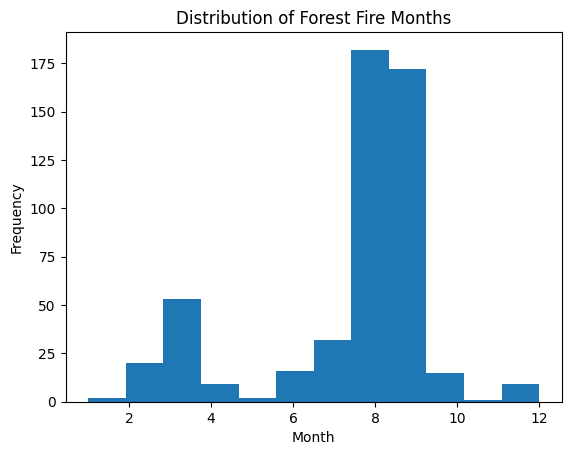

In [ ]:
# visualize distribution of fire months
print(X['month'].unique())
plt.hist(X['month'], bins=12)
plt.title('Distribution of Forest Fire Months')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.show()

[5 2 6 7 1 3 4]


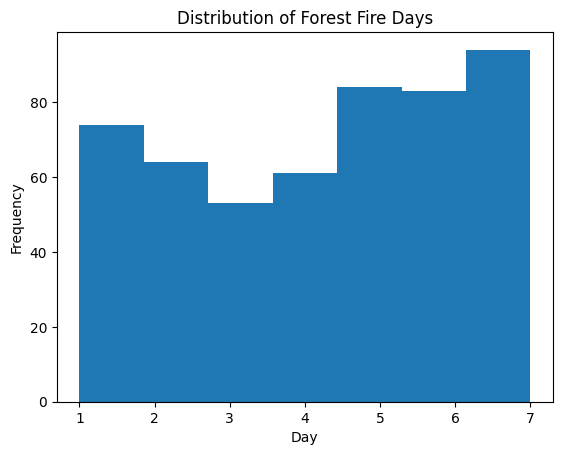

In [ ]:
# visualize distribution of fire days
print(X['day'].unique())
plt.hist(X['day'], bins=7)
plt.title('Distribution of Forest Fire Days')
plt.xlabel('Day')
plt.ylabel('Frequency')
plt.show()

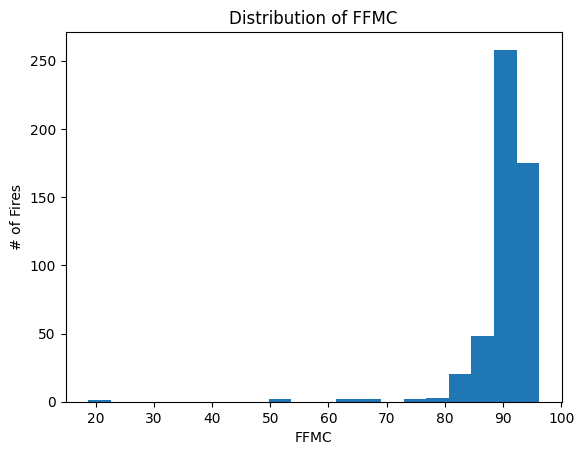

In [ ]:
# examine FFMC - fine fuel moisture code
# measures: moisture in surface litter (leaves, twigs)
# indicates: ease of ignition and surface fire spread
# high ffmc -> fire will ignite easily

plt.hist(X['FFMC'], bins=20)
plt.title('Distribution of FFMC')
plt.xlabel('FFMC')
plt.ylabel('# of Fires')
plt.show()

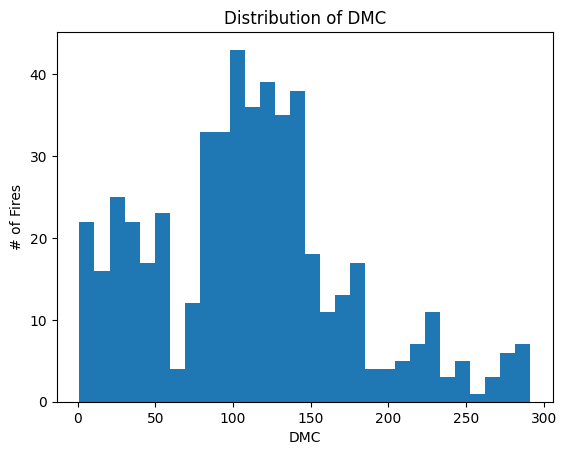

In [ ]:
# examine DMC - duff moisture code
# measures: moisture in upper soil layer (duff, roots)
# indicates: fire sustainability after ignition
# high DMC -> fire burns sustainably, not just flare up

plt.hist(X['DMC'], bins=30)
plt.title('Distribution of DMC')
plt.xlabel('DMC')
plt.ylabel('# of Fires')
plt.show()

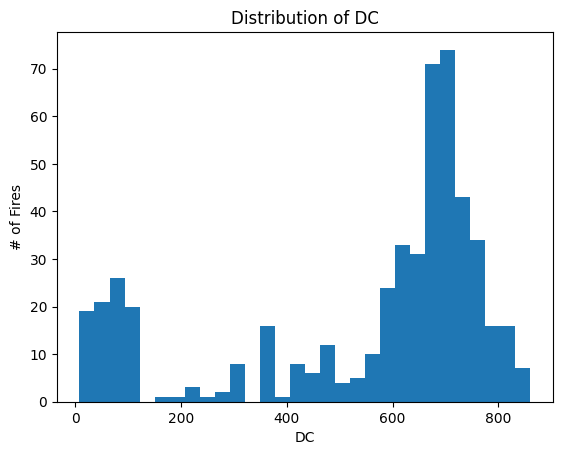

In [ ]:
# examine DC - drought code
# measures: moisture in deep, compact organic layers
# indicates: long term fire potential and deep burning
# high DC -> forest is deeply dry, risk of long-lasting fires

plt.hist(X['DC'], bins=30)
plt.title('Distribution of DC')
plt.xlabel('DC')
plt.ylabel('# of Fires')
plt.show()

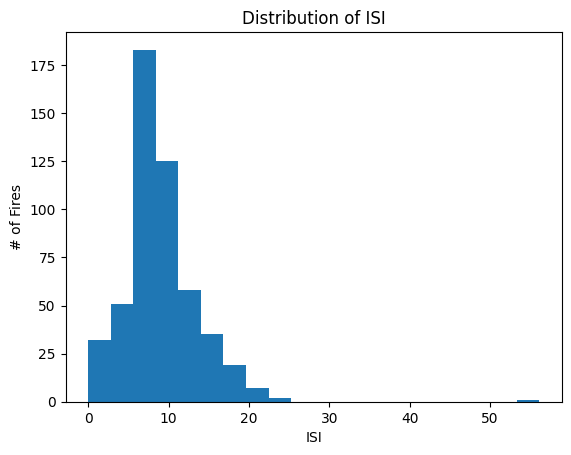

In [ ]:
# ISI - initial spread index
# measures: combined FFMC + wind
# indicates: rate of fire spread immediately after ignition
# high ISI -> fire spreads quickly and aggressively once started

plt.hist(X['ISI'], bins=20)
plt.title('Distribution of ISI')
plt.xlabel('ISI')
plt.ylabel('# of Fires')
plt.show()

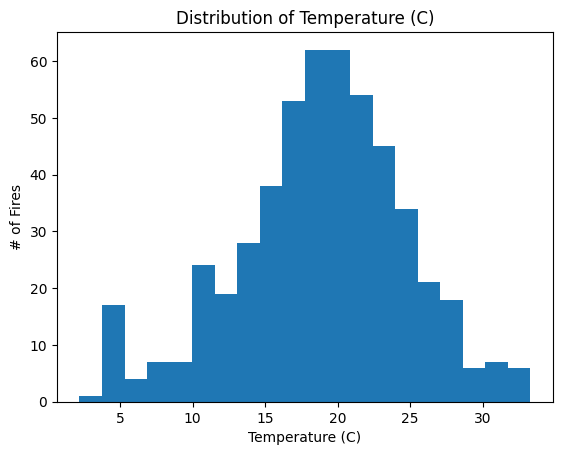

In [ ]:
#  examine temp
plt.hist(X['temp'], bins=20)
plt.title('Distribution of Temperature (C)')
plt.xlabel('Temperature (C)')
plt.ylabel('# of Fires')
plt.show()

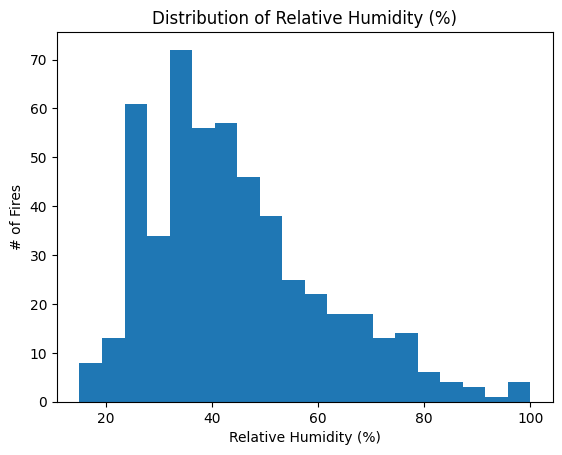

In [ ]:
# examine RH relative humidity

plt.hist(X['RH'], bins=20)
plt.title('Distribution of Relative Humidity (%)')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('# of Fires')
plt.show()

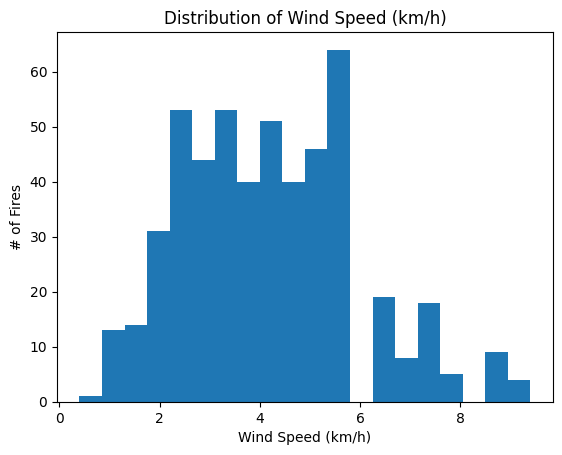

In [ ]:
# examine wind
plt.hist(X['wind'], bins=20)
plt.title('Distribution of Wind Speed (km/h)')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('# of Fires')
plt.show()

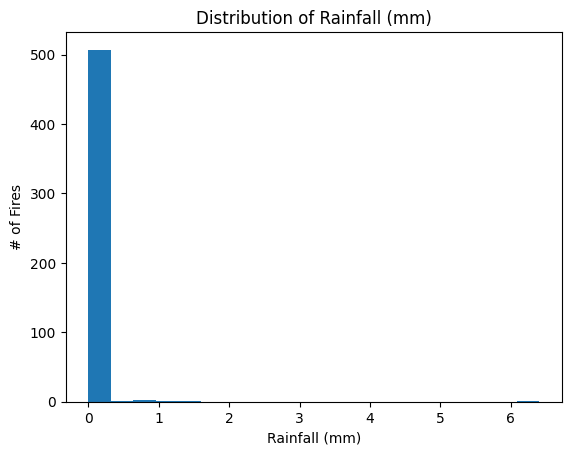

In [ ]:
# examine rain
plt.hist(X['rain'], bins=20)
plt.title('Distribution of Rainfall (mm)')
plt.xlabel('Rainfall (mm)')
plt.ylabel('# of Fires')
plt.show()

log_area    1.000000
month       0.121247
DC          0.072025
DMC         0.071648
wind        0.068162
X           0.060574
temp        0.055495
FFMC        0.047155
Y           0.040032
rain        0.023307
day        -0.000793
ISI        -0.009467
RH         -0.051930
Name: log_area, dtype: float64


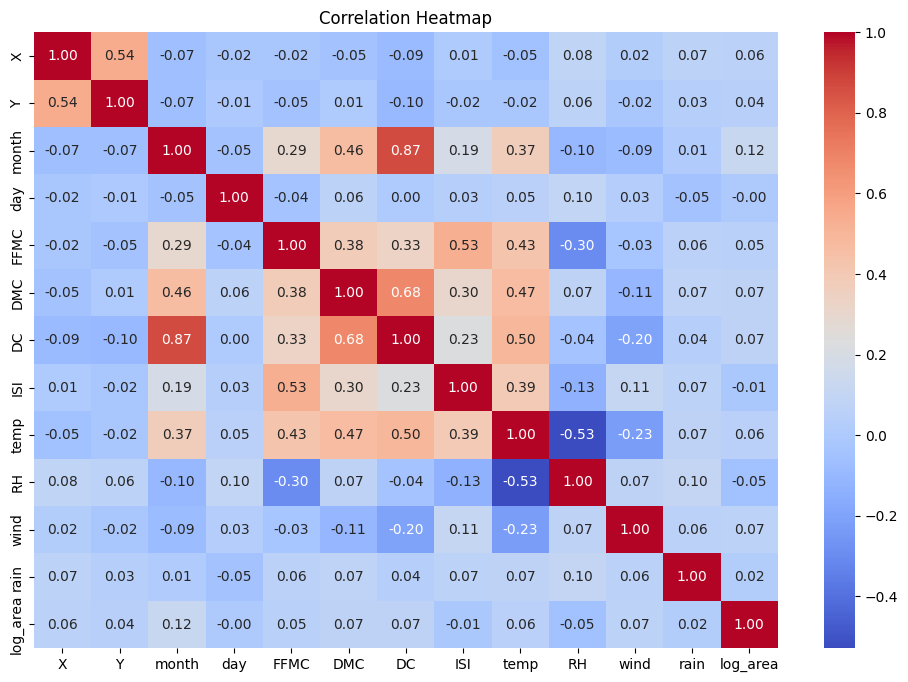

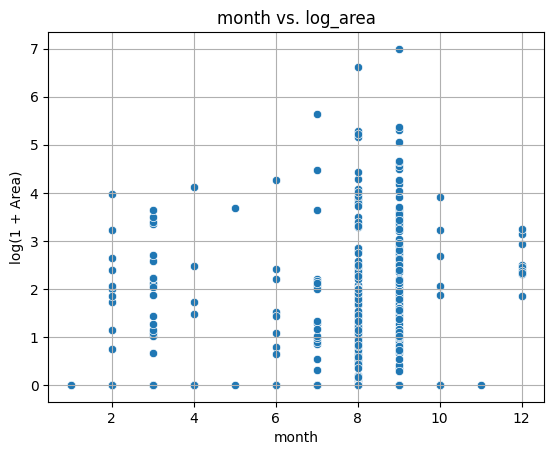

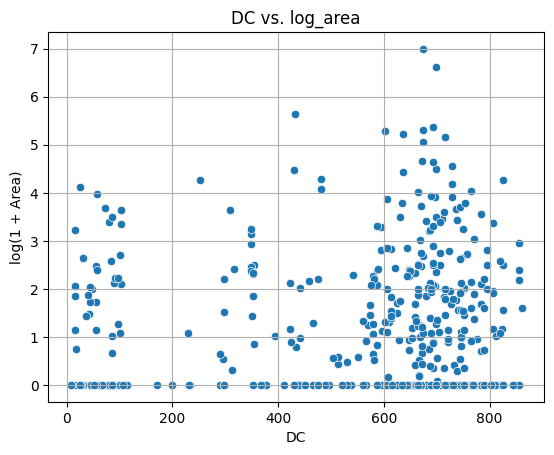

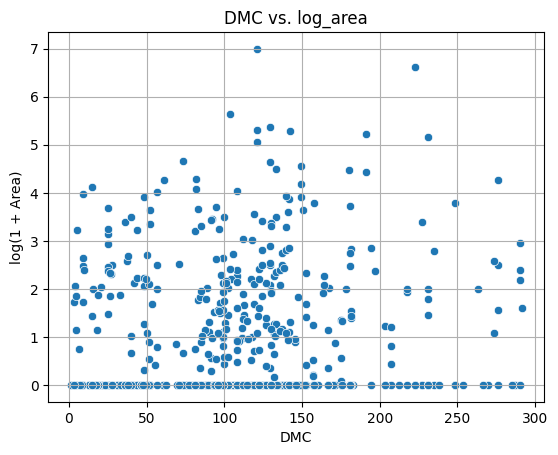

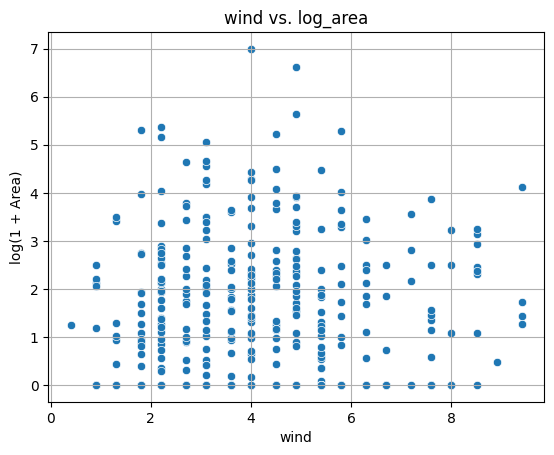

In [ ]:
# analyze correlations between predictors and target variable (log_area)
combined = pd.concat([X, y['log_area']], axis=1)

# correlation matrix (numeric insight)
correlation_matrix = combined.corr()
print(correlation_matrix['log_area'].sort_values(ascending=False))

# heatmap (visual insight)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

top_features = correlation_matrix['log_area'].abs().sort_values(ascending=False)[1:5].index

for col in top_features:
    sns.scatterplot(data=combined, x=col, y='log_area')
    plt.title(f'{col} vs. log_area')
    plt.xlabel(col)
    plt.ylabel('log(1 + Area)')
    plt.grid(True)
    plt.show()


📊 Predictor: FFMC
R-squared: 0.0022
Influential Points (Cook's D > 0.0078): [ 12 197 230 231 232 233 234 235 296 308 373 375 391 411 416 475 509]


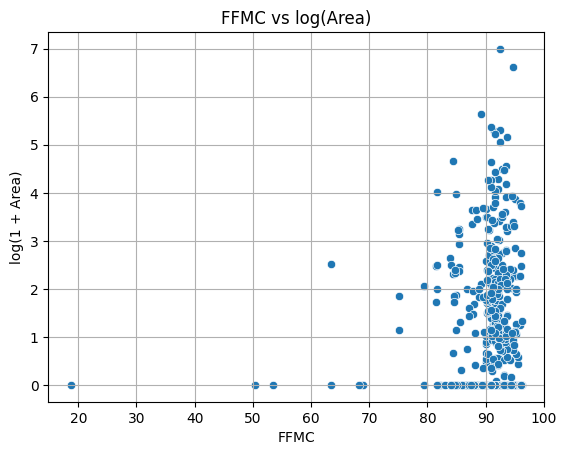

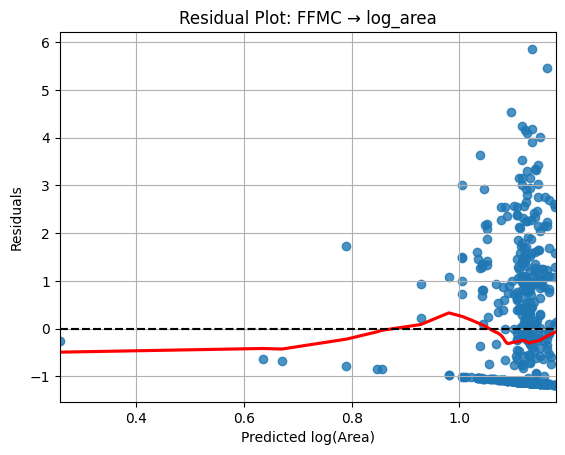


📊 Predictor: DMC
R-squared: 0.0051
Influential Points (Cook's D > 0.0078): [223 228 230 231 232 233 234 235 281 290 370 373 379 384 388 391 411 416
 426 436 444 453 465 467 469 475]


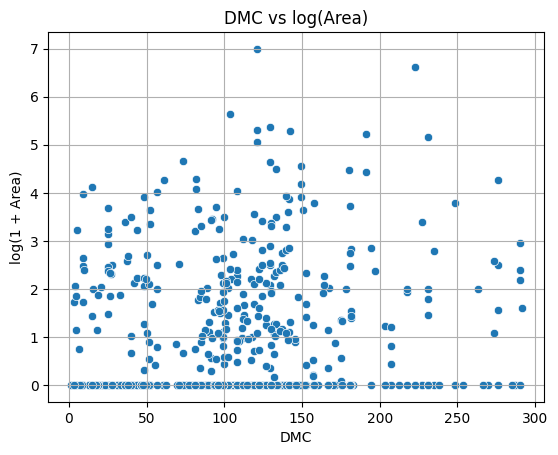

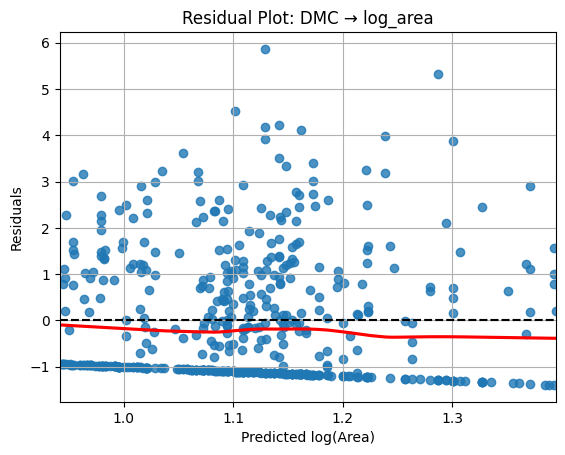


📊 Predictor: DC
R-squared: 0.0052
Influential Points (Cook's D > 0.0078): [200 211 212 216 219 228 229 231 232 233 234 235 281 373 388 391 411 416
 465 467 469 475]


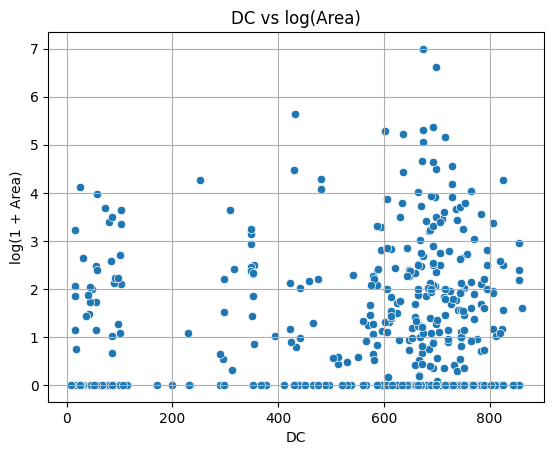

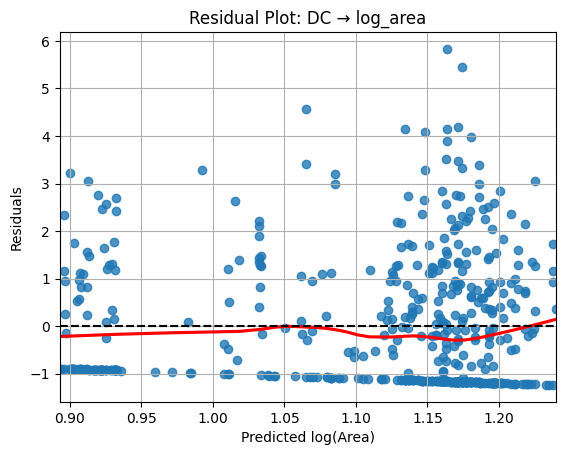


📊 Predictor: ISI
R-squared: 0.0001
Influential Points (Cook's D > 0.0078): [ 22 204 207 209 210 230 231 232 233 234 235 373 391 411 416 475 484 494
 500 509]


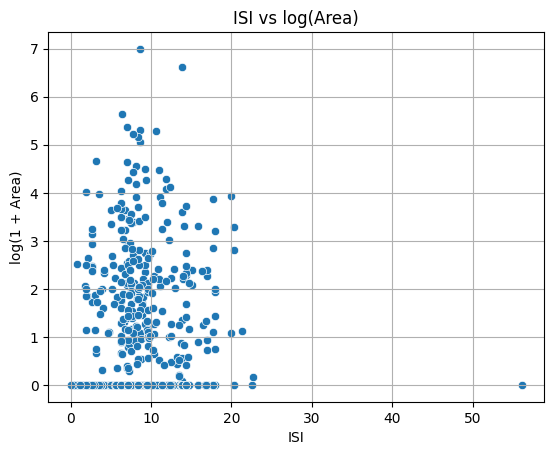

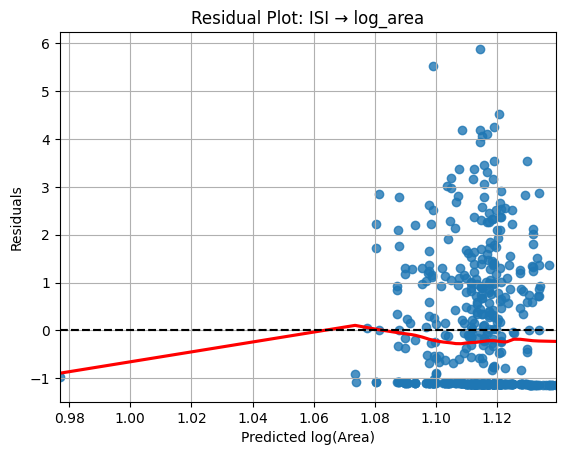


📊 Predictor: temp
R-squared: 0.0031
Influential Points (Cook's D > 0.0078): [209 211 219 225 227 228 230 231 232 233 234 235 271 273 274 275 277 278
 281 290 373 391 411 416 465 469 475 480 489 494 500]


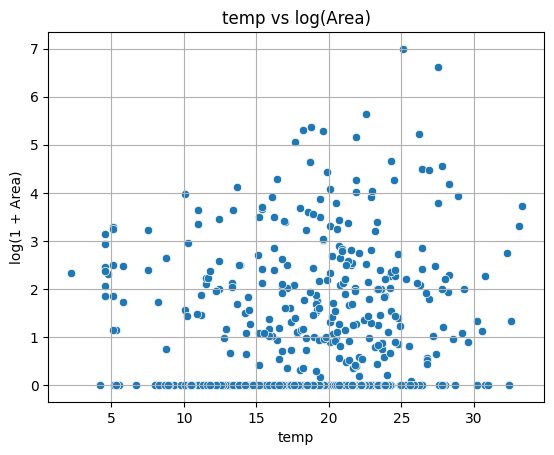

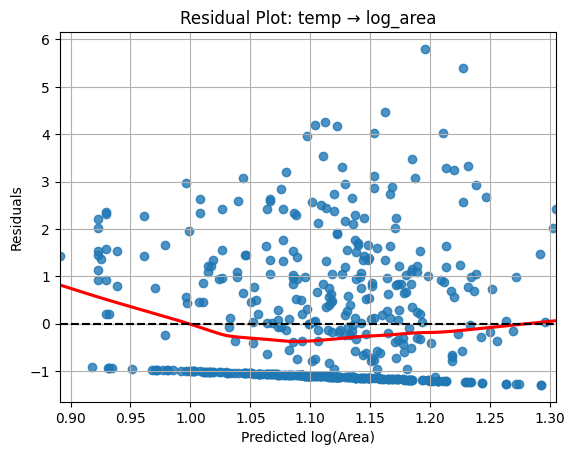


📊 Predictor: RH
R-squared: 0.0027
Influential Points (Cook's D > 0.0078): [209 214 215 220 225 227 228 230 231 232 233 234 235 290 370 373 391 411
 416 447 475 484 509]


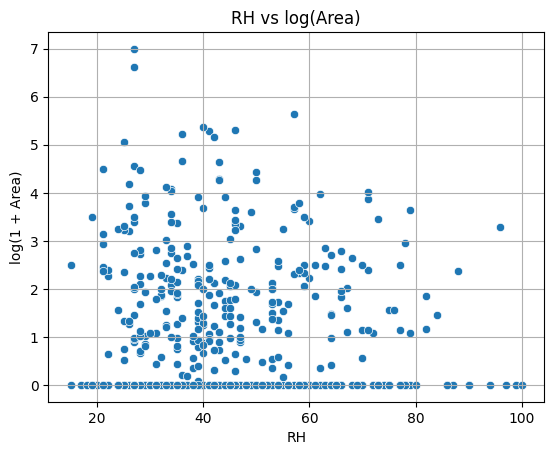

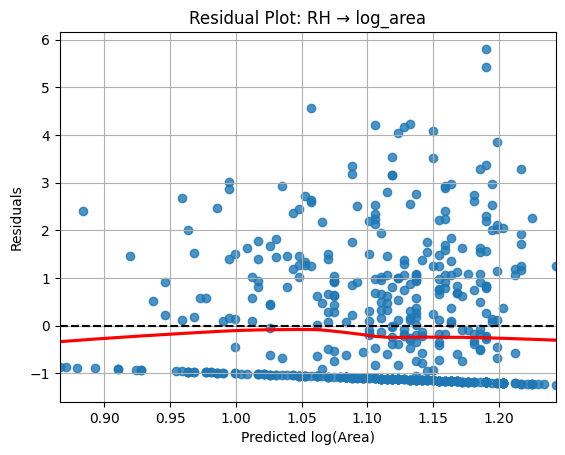


📊 Predictor: wind
R-squared: 0.0046
Influential Points (Cook's D > 0.0078): [213 215 229 230 231 232 233 234 235 273 275 278 281 290 316 333 373 391
 411 416 465 475 484 509]


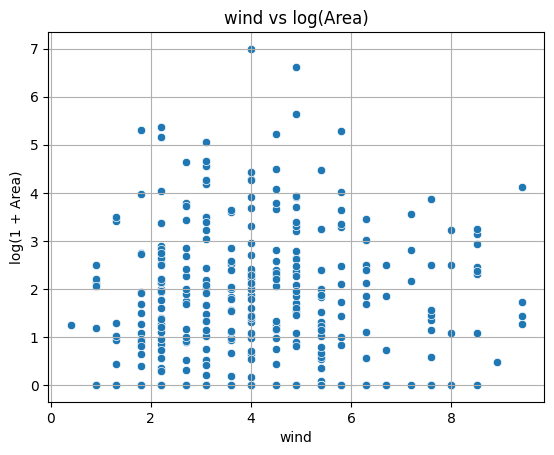

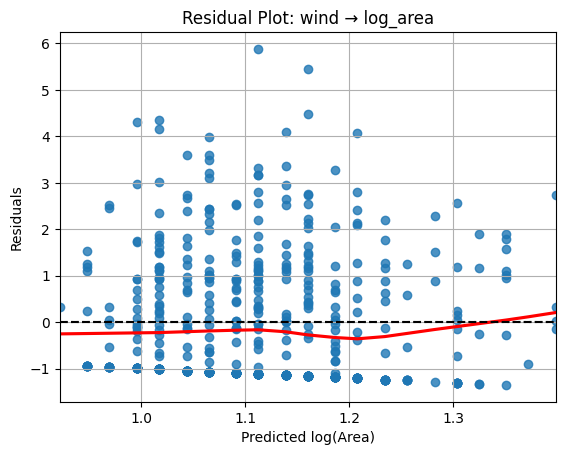


📊 Predictor: rain
R-squared: 0.0005
Influential Points (Cook's D > 0.0078): [231 232 233 234 235 240 373 411 416 475 495]


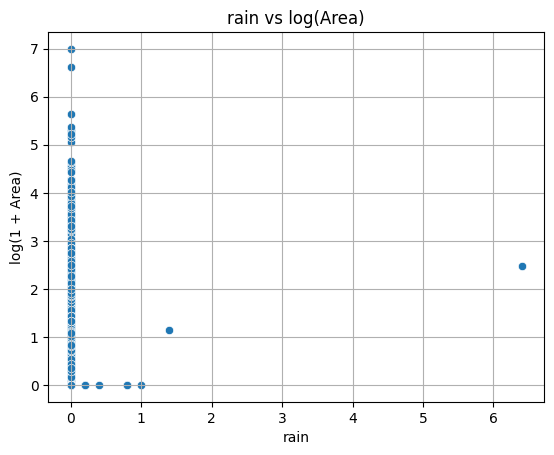

/usr/local/lib/python3.11/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


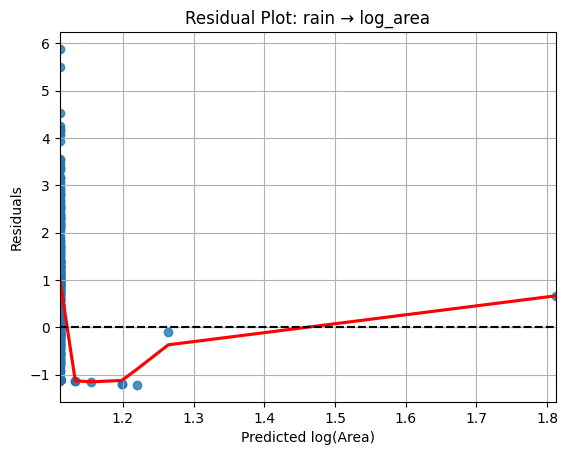

In [ ]:
# attempt a simple linear regression model for all 8 predictors

# define variables
# independent variable x = predictors
# dependent variable y = area or log area, y['area'] or y['log_area']

predictors = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']

for var in predictors:
    # add constant for sm.OLS
    X_var = sm.add_constant(combined[var])
    y = combined['log_area']

    # fit the model
    model = sm.OLS(y, X_var).fit()

    # calculate y predicted using model and X_var observed data
    y_pred = model.predict(X_var)

    # calculate residuals = y observed - y predicted
    residuals = y - y_pred

    print(f"\n📊 Predictor: {var}")
    print(f"R-squared: {model.rsquared:.4f}")

    threshold = 4 / len(X_var)
    influence = model.get_influence()
    cooks_d, _ = influence.cooks_distance
    influential_points = np.where(cooks_d > threshold)[0]
    print(f"Influential Points (Cook's D > {threshold:.4f}): {influential_points}")

    # Scatter plot
    sns.scatterplot(x=combined[var], y=combined['log_area'])
    plt.title(f'{var} vs log(Area)')
    plt.xlabel(var)
    plt.ylabel('log(1 + Area)')
    plt.grid(True)
    plt.show()

    # Residual plot
    sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={"color": "red"})
    plt.axhline(0, color='black', linestyle='--')
    plt.xlabel('Predicted log(Area)')
    plt.ylabel('Residuals')
    plt.title(f'Residual Plot: {var} → log_area')
    plt.grid(True)
    plt.show()



**FFMC assessment**
R-squared is low. Less than 1% of the variation in log_area is explained by FFMC
Statistically - FFMC is not useful on its own for predicting fire size
Visually - there is no clear linear relationship
Cook's d - several points are influential, they disproportionately affect the
regression line, but FFMC's model is already weak, so this influence doesn't distort much
residual plot - the red line is mostly flat
random scatter - residuals are randomly scattered around horizontal axis
regression model likely fits data well
curvature - a curved pattern in residual plot suggests a violation of the linearity assumption.
this may indicate the relationship between the variables is not linear


**DMC assessment**
R-squared is low. Less than 1% of the variation in log-area is explained by DMC
Statistically - DMC is not useful on its own for predicting fire size
Visually - there is no clear linear relationship
Cook's d - several points are influential, disproprotionately affecting the regression line. DMC's model is already weak, so this influence doesn't distortot much
Residual plot - the red line is mostly flat. There is random scatter. Residuals are randomly scattered around horizontal axis. There is no clear curvature, no funnel shapes and no clustering by predicted values. Regression model likely fits data well and the relationship between DMC and log_area is linear

**DC assessment**
R-squared is low. Less than 1% of the variation in log_area is explained by DC
Statistically - DC is not useful on its own for predicting fire size
Visually - there is no clear linear relationship
Cook's d - several points are influential, they disproprionately affect the regression line, but DC's model is already weak, so this influence doesn't distort much
Residual plot - the red line is mostly flat. There is random scatter. Residuals are randomly scattered around horizontal axis. There is no clear curvature or funnel shape. Linear model assumptions are reasonably met.

**ISI assessment**
R-squared is low. Less than 1% of the variation in log_area is explained by ISI
Statistically - ISI is not useful on its own for predicting fire size
Visually - there is no clear linear relationship
Cook's d - several points are influential, they disproportionately affect the regression line, but ISI's model is already weak so this influence doesn't distort much
residual plot - There is a slight curve suggesting non-linearity. Spread is uneven - there is heteroscedasticity - variance of residuals increases with predicted values. Residuals do not appear randomly scattered


Temp, RH, Wind, Rain

**Temp assessment**
R-squared is low. Less than 1% of variation in log-area is explained by temp
Statistically - temp is not useful on its own for predicting fire size
Visually - there is no clear linear relationship
Cook's d - several points are influential, they disproportionally affect the regression line, but the temp model is weak so this influence doesn't distort much
Residual plot - There is a slight curve suggesting non-linearity. There is a wider spread of residuals as area increases. There is a funnel shape suggesting a violation of the constant variance assumption.

**RH assessment**
R-squared is low. Less than 1% of variation in log_area is explained by RH
Statistically - RH is not useful on its own for predicdting fire size
visually there is no clear linear relationship
Cook's d - several points are influential, they disproportionally affect the regression line, but RH model is weak so this influence doesn't distort much
residual plot - the line is nearly flat with a slight dip but no curvature
Residuals appear randomly dispersed around 0. Linearity and homoscedasticity are satisfied.

**Wind assessment**
R-squared is low. Less than 1% of variation in log_area is explained by wind
Statistically - wind is not useful on its own for predicdting fire size
visually there is no clear linear relationship
Cook's d - several points are influential, they disproportionally affect the regression line, but the wind model is weak so this influence doesn't distort much
residual plot - the red line is mostly flat, the residual scatter is centered around 0. there is no clear funnel shape so variance is constant. The model is valid but not a strong predictor of fire area.

**rain assessment**
R-squared is low. Less than 1% of variation in log_area is explained by rain
Statistically - rain is not useful on its own for predicdting fire size
visually there is no clear linear relationship
Cook's d - several points are influential, they disproportionally affect the regression line, but the rain model is weak so this influence doesn't distort much
residual plot - there is strong nonlinearity, the residuals are clustered around a single predicted value, a few rainy days are influencing the residual plot. Rain is highly skewed, the residual plot showing a strong non-linear trend. Rain does not behave like a continuous predictor. consider using rain as a binary feature

In [ ]:
# fit a baseline multiple linear regression model with key predictors
# use DMC, DC, RH, and wind as key predictors

X = combined[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']]
y = combined['log_area']

# add constant for intercept
X_const = sm.add_constant(X)

# verify shapes of X and y
print(X_const.shape, y.shape)

# fit the basic multiple linear regression model
baseline_model = smf.ols(formula = 'log_area ~ FFMC + DMC + DC + ISI + temp + RH + wind + rain', data = combined).fit()

# return r2 value to 4 decimal places
r2 = round(baseline_model.rsquared, 4)
print(r2)

# model summary
print(baseline_model.summary())

(513, 9) (513,)
0.0209
                            OLS Regression Results                            
Dep. Variable:               log_area   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.343
Date:                Sat, 24 May 2025   Prob (F-statistic):              0.220
Time:                        05:52:28   Log-Likelihood:                -893.77
No. Observations:                 513   AIC:                             1806.
Df Residuals:                     504   BIC:                             1844.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2219      1.

with an R-squared value of 0.021, only ~2% of variance in log_area is explained by the baseline model. The adjusted r-squared value is only 0.005, penalizing heavily the use of so many preditor variables. The model is overfitted and doesn't capture any meaningful patterns in the data. Only wind has a p-value < 0.05, so its the only predictor value of any statistical significance.

In [ ]:
# Calculate VIF for each feature
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['Feature'] = X_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Display sorted VIFs
print(vif_data.sort_values('VIF', ascending=False))


  Feature         VIF
0   const  487.929533
5    temp    2.662988
2     DMC    2.327714
3      DC    2.077963
6      RH    1.897991
1    FFMC    1.696803
4     ISI    1.578962
7    wind    1.140405
8    rain    1.044841


Multicollinearity is not an issue with this model with low VIF values.

In [ ]:
# include nonlinear terms
combined['FFMC_squared'] = combined['FFMC'] ** 2
combined['RH_squared'] = combined['RH'] ** 2
combined['wind_squared'] = combined['wind'] ** 2

# Fit the quadratic model
quadratic_model = smf.ols(
    formula='log_area ~ FFMC + FFMC_squared + DMC + DC + RH + RH_squared + wind + wind_squared',
    data=combined
).fit()

# View R² and model summary
r2_quad = round(quadratic_model.rsquared, 4)
print(r2_quad)
print(quadratic_model.summary())

# find adjusted r-squared for both base and quad models
adjusted_r2_base = baseline_model.rsquared_adj
adjusted_r2_quad = quadratic_model.rsquared_adj

print(f"Adjusted r-squared for base model: {adjusted_r2_base}")
print(f"Adjusted r-squared for quadratic model: {adjusted_r2_quad}")

0.0198
                            OLS Regression Results                            
Dep. Variable:               log_area   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.272
Date:                Sat, 24 May 2025   Prob (F-statistic):              0.256
Time:                        05:52:28   Log-Likelihood:                -894.05
No. Observations:                 513   AIC:                             1806.
Df Residuals:                     504   BIC:                             1844.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.9997      2.291     -0

The quadratic model is not much of an improvement. R-squared is 0.020 basically the same as the baseline. The adjusted R-squared is even lower at 0.004. With this model there are no predictors with a p < 0.05. No predictors have any statistical significance.

In [ ]:
# add interaction terms (between predictors with strong correlations)
interaction_model = smf.ols(formula = 'log_area ~ FFMC + FFMC_squared + DMC + DC + RH + RH_squared + wind + wind_squared \
+ wind*RH + DMC*DC + temp*RH', data=combined).fit()

# View R² and model summary
r2_interact = round(interaction_model.rsquared, 4)
print(r2_interact)
print(interaction_model.summary())

0.0226
                            OLS Regression Results                            
Dep. Variable:               log_area   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.9642
Date:                Sat, 24 May 2025   Prob (F-statistic):              0.482
Time:                        05:52:28   Log-Likelihood:                -893.31
No. Observations:                 513   AIC:                             1813.
Df Residuals:                     500   BIC:                             1868.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -2.7287      2.950     -0

The interaction model still has a low R-squared value. Its adjusted r-squared value is negative, meaning this model is very overfitted.There are no terms with any statistical significance.

In [ ]:
# simplified model
simplified_model = smf.ols(formula = 'log_area ~ FFMC + DMC + DC + RH + wind', data=combined).fit()

r2_simple = round(simplified_model.rsquared, 4)
print(r2_simple)
print(simplified_model.summary())

0.0165
                            OLS Regression Results                            
Dep. Variable:               log_area   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.703
Date:                Sat, 24 May 2025   Prob (F-statistic):              0.132
Time:                        05:52:28   Log-Likelihood:                -894.90
No. Observations:                 513   AIC:                             1802.
Df Residuals:                     507   BIC:                             1827.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9208      1.202      0.766  

In [ ]:
# Incorporate indicator variables
# Step 1: Define rainy vs. fire season
# Fire season: May (5) to October (10); Rainy season: November to April
combined['fire_season'] = combined['month'].apply(lambda m: 1 if m in [5, 6, 7, 8, 9, 10] else 0)

# Step 2: Fit the model including the fire_season indicator
season_model = smf.ols(
    formula='log_area ~ FFMC + DMC + DC + RH + wind + fire_season',
    data=combined
).fit()

# Step 3: View results
print(f"R-squared: {season_model.rsquared:.4f}")
print(season_model.summary())

R-squared: 0.0177
                            OLS Regression Results                            
Dep. Variable:               log_area   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.516
Date:                Sat, 24 May 2025   Prob (F-statistic):              0.171
Time:                        05:52:28   Log-Likelihood:                -894.61
No. Observations:                 513   AIC:                             1803.
Df Residuals:                     506   BIC:                             1833.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.7818      1.21

Attempted to incorporate an indicator variable, to have a fire vs wet season variable. The stats are even worse for this model, with no predictors having any statistical significance.

In [ ]:
# compare model metrics

# R-squared values
print(f"R-squared for base model: {r2:.3f}")
print(f"R-squared for quadratic model: {r2_quad:.3f}")
print(f"R-squared for interaction model: {r2_interact:.3f}")
print(f"R-squared for simplified model: {r2_simple:.3f}")
print(f"R-squared for season model: {season_model.rsquared:.3f}\n")

# adjusted r-squared values
print(f"Adjusted R-squared for base model: {adjusted_r2_base:.3f}")
print(f"Adjusted R-squared for quadratic model: {adjusted_r2_quad:.3f}")
print(f"Adjusted R-squared for interaction model: {interaction_model.rsquared_adj:.3f}")
print(f"Adjusted R-squared for simplified model: {simplified_model.rsquared_adj:.3f}")
print(f"Adjusted R-squared for season model: {season_model.rsquared_adj:.3f}\n")

# AIC
print(f"AIC for base model: {baseline_model.aic:.2f}")
print(f"AIC for quadratic model: {quadratic_model.aic:.2f}")
print(f"AIC for interaction model: {interaction_model.aic:.2f}")
print(f"AIC for simplified model: {simplified_model.aic:.2f}")
print(f"AIC for season model: {season_model.aic:.2f}\n")

# BIC
print(f"BIC for base model: {baseline_model.bic:.2f}")
print(f"BIC for quadratic model: {quadratic_model.bic:.2f}")
print(f"BIC for interaction model: {interaction_model.bic:.2f}")
print(f"BIC for simplified model: {simplified_model.bic:.2f}")
print(f"BIC for season model: {season_model.bic:.2f}")

R-squared for base model: 0.021
R-squared for quadratic model: 0.020
R-squared for interaction model: 0.023
R-squared for simplified model: 0.017
R-squared for season model: 0.018

Adjusted R-squared for base model: 0.005
Adjusted R-squared for quadratic model: 0.004
Adjusted R-squared for interaction model: -0.001
Adjusted R-squared for simplified model: 0.007
Adjusted R-squared for season model: 0.006

AIC for base model: 1805.53
AIC for quadratic model: 1806.10
AIC for interaction model: 1812.62
AIC for simplified model: 1801.81
AIC for season model: 1803.21

BIC for base model: 1843.69
BIC for quadratic model: 1844.26
BIC for interaction model: 1867.74
BIC for simplified model: 1827.25
BIC for season model: 1832.89


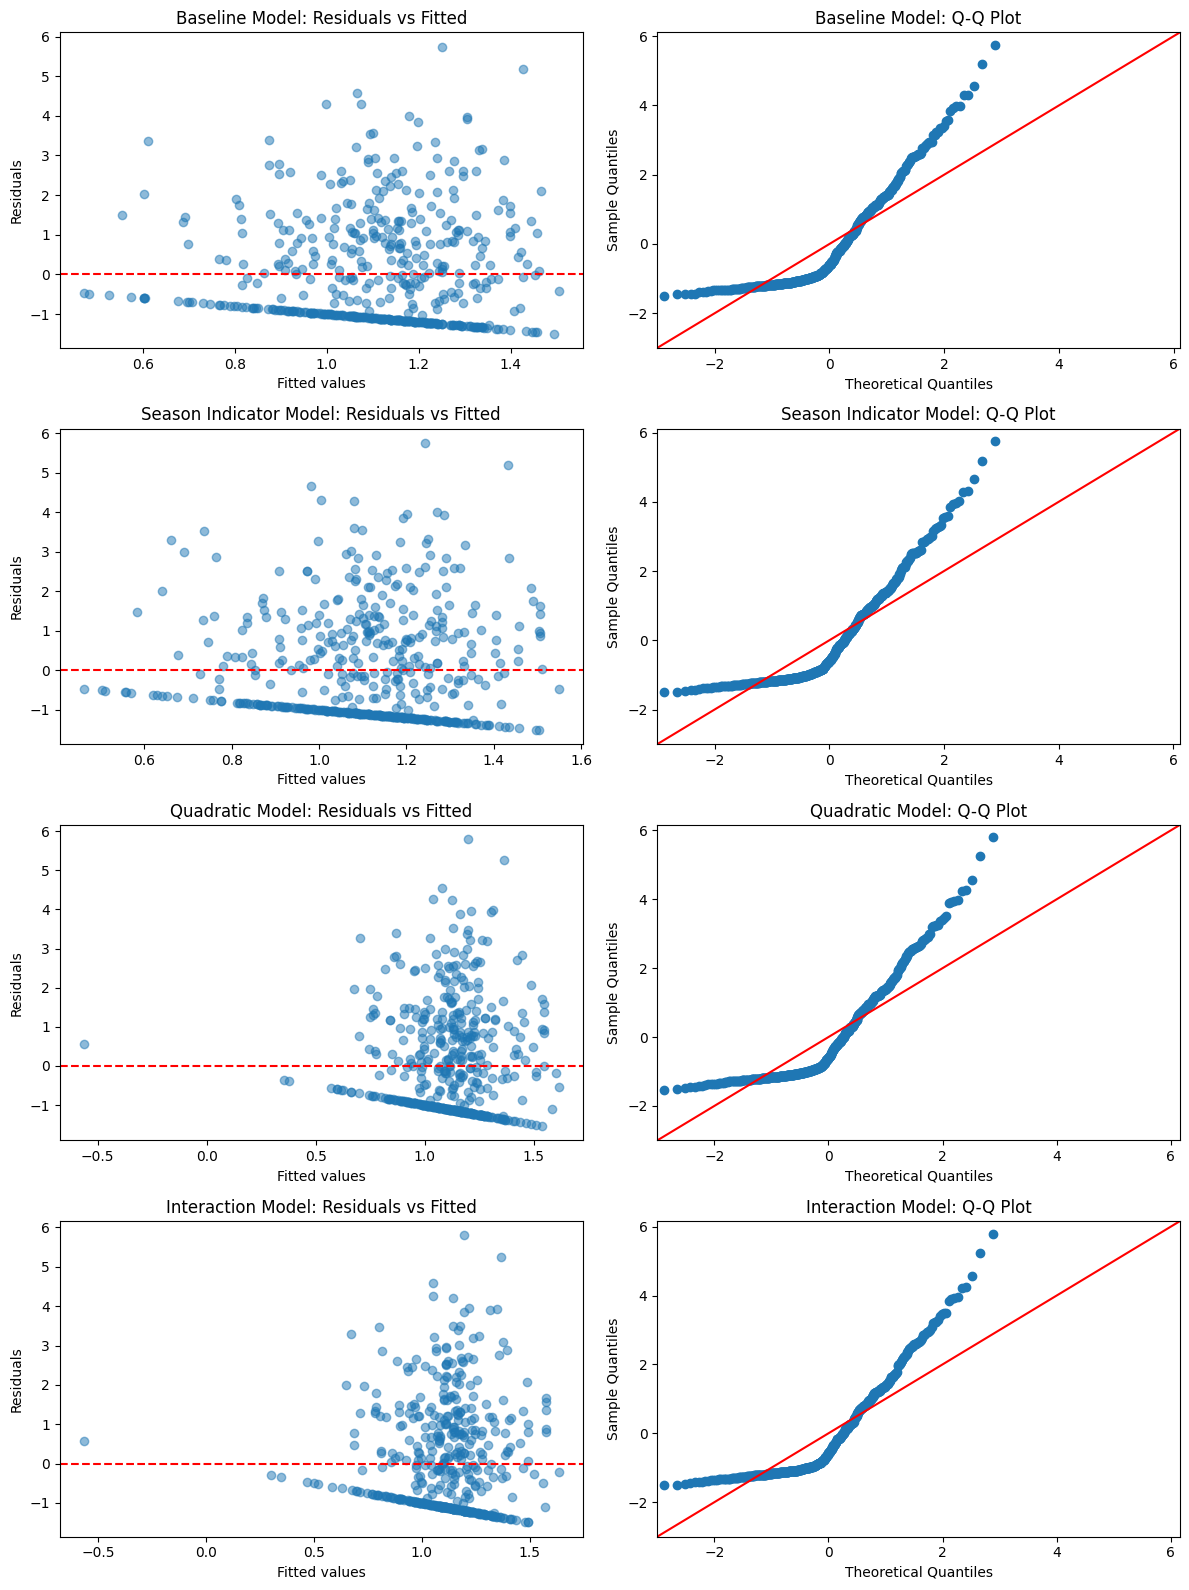

In [ ]:

# 1. Fit all models

# Baseline simplified model
simplified_model = smf.ols(
    formula='log_area ~ FFMC + DMC + DC + RH + wind',
    data=combined
).fit()

# Season indicator model
season_indicator_model = smf.ols(
    formula='log_area ~ FFMC + DMC + DC + RH + wind + fire_season',
    data=combined
).fit()

# Quadratic model
quadratic_model = smf.ols(
    formula='log_area ~ FFMC + FFMC_squared + DMC + DC + RH + RH_squared + wind + wind_squared',
    data=combined
).fit()

# Interaction model
interaction_model = smf.ols(
    formula='log_area ~ FFMC + FFMC_squared + DMC + DC + RH + RH_squared + wind + wind_squared '
            '+ wind:RH + DMC:DC + temp:RH',
    data=combined
).fit()

# 2. Create residual and Q-Q plots
models = {
    "Baseline": simplified_model,
    "Season Indicator": season_indicator_model,
    "Quadratic": quadratic_model,
    "Interaction": interaction_model
}

fig, axes = plt.subplots(len(models), 2, figsize=(12, 4 * len(models)))

for i, (label, model) in enumerate(models.items()):
    # Residuals vs Fitted
    axes[i, 0].scatter(model.fittedvalues, model.resid, alpha=0.5)
    axes[i, 0].axhline(0, color='red', linestyle='--')
    axes[i, 0].set_title(f"{label} Model: Residuals vs Fitted")
    axes[i, 0].set_xlabel("Fitted values")
    axes[i, 0].set_ylabel("Residuals")

    # Q-Q Plot
    sm.qqplot(model.resid, line='45', ax=axes[i, 1])
    axes[i, 1].set_title(f"{label} Model: Q-Q Plot")

plt.tight_layout()
plt.show()

In [ ]:
# Define Cook’s Distance threshold
threshold = 4 / len(combined)

# Analyze and collect results
influential_summary = []

for name, model in models.items():
    influence = model.get_influence()
    cooks_d, _ = influence.cooks_distance
    influential_indices = np.where(cooks_d > threshold)[0]

    influential_summary.append({
        "Model": name,
        "Cook's D": cooks_d,
        "Num Influential Points": len(influential_indices),
        "First 5 Influential Indices": influential_indices[:5].tolist()
    })

# Display result as DataFrame
influential_df = pd.DataFrame(influential_summary)
print(influential_df)

              Model                                           Cook's D  \
0          Baseline  [0.001070736230423271, 0.0011702771964615909, ...   
1  Season Indicator  [0.0011418290757665404, 0.0009913954862710087,...   
2         Quadratic  [0.0010527660403425658, 0.001588810006348988, ...   
3       Interaction  [0.0011246355429385725, 0.001333354449306349, ...   

   Num Influential Points First 5 Influential Indices  
0                      19    [12, 197, 209, 220, 230]  
1                      21   [197, 209, 220, 230, 235]  
2                      21    [12, 197, 209, 215, 220]  
3                      24    [12, 209, 215, 220, 230]  


In [ ]:
# split data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Ridge regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# predict and calculate MSE
ridge_pred = ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)

# return ridge_mse, rounded to 4 decimal places
print(f"Ridge MSE: {round(ridge_mse, 4)}")

print(f"Ridge coefficients: {ridge.coef_}")

Ridge MSE: 1.6465
Ridge coefficients: [ 0.01044166  0.00059344  0.00017035 -0.03014582  0.02006267 -0.000492
  0.07592957  0.08834941]


In [ ]:
# Lasso regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# define lasso-pred and find lasso_mse based on y_test and lasso_pre
lasso_pred = lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)

# return lasso_mse rounded to 4 decimal places
print(f"Lasso MSE: {lasso_mse:.4f}")

print(f"Lasso coefficients: {lasso.coef_}")

Lasso MSE: 1.6454
Lasso coefficients: [ 0.00084224  0.00083093  0.00017976 -0.00636505  0.00662132 -0.00223322
  0.02990109  0.        ]


The Ridge coefficients are very weak, they dont help in any meaninful way. The lasso coefficients have been driven to almost 0.
The MSEs are very close to each other, so neither model is better than the other. Another modeling strategy is needed.

In [ ]:
# Create a binary target variable based on a threshold in y (e.g., median or other percentile).
# 1 if a fire occurred (area > 0)
# 0 if no fire (area = 0)

combined['area'] = forest_fires.data.targets.copy()
combined['fire_occurred'] = (combined['area'] > 0).astype(int)

combined['fire_occurred']

,fire_occurred
0,0
1,0
2,0
3,0
4,0
...,...
512,1
513,1
514,1
515,0


In [ ]:
# Select relevant predictors and scale them using StandardScaler.
# Select predictors
predictors = ['FFMC', 'DMC', 'DC', 'RH', 'wind', 'temp', 'rain', 'ISI']
X = combined[predictors]
y = combined['fire_occurred']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# return the shapes of the arrays
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# Scale
scaler = StandardScaler()

# transform training and testing predictors
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# shape of X_test_scaled
X_test_scaled.shape

(154, 8)

In [ ]:
# train logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
# output intercept and coefficients
print(f"Intercept: {logistic_model.intercept_}")
print(f"Coefficients: {logistic_model.coef_}")

Intercept: [0.12874295]
Coefficients: [[ 0.17228348 -0.14606756  0.25697078  0.16194373  0.25416967  0.20212652
  -0.16092955 -0.03344999]]


In [ ]:
# predict probabilities and binary outcomes
y_pred_prob = logistic_model.predict_proba(X_test_scaled)[:, 1]
y_pred_class = logistic_model.predict(X_test_scaled)

# display predictions
print("Predicted probabilities:", y_pred_prob[:5])
print("Predicted classes:", y_pred_class[:5])

Predicted probabilities: [0.63907615 0.50641635 0.71152174 0.5676926  0.62842952]
Predicted classes: [1 1 1 1 1]


In [ ]:
# confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_class))

Confusion Matrix:
[[18 58]
 [15 63]]


In [ ]:
# precision
print("Precision:", precision_score(y_test, y_pred_class))

Precision: 0.5206611570247934


In [ ]:
from sklearn.metrics import recall_score, f1_score

# Compute recall and F1 score
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)

print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Recall: 0.8077
F1 Score: 0.6332


In [ ]:
# check multicollinearity using VIF
vif = pd.DataFrame()
vif['Variable'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train_scaled.values, i) for i in range(X_train_scaled.shape[1])]

print(round(vif, 3))

  Variable    VIF
0     FFMC  1.691
1      DMC  2.385
2       DC  2.142
3       RH  2.053
4     wind  1.150
5     temp  2.726
6     rain  1.066
7      ISI  1.521


The baseline, quadratic, interaction, simplified, and season models were all very weak, and had very poor fit. Their R-squared values were tiny, which means that these models did not explain the area of fire very well. No version of regression explained more than 2% of the variation in log_area. The regularized models (Ridge and Lasso) didn't improvement performance either.

The classification model for predicting whether a fire occurred did well at identifying when fires occur. It did overpredict fires, resulting in a moderate F1 score and precision.

The baseline linear regression is easy to execute and easy to interpret. In this case, it did not do well and performance was non-existent. The quadratic and interaction regression models are a little more complicated anda little harder to interpret. They should be more capable than the baseline model, as they can account for nonlinear relationships and variables that interact with each other. However, in this case even quadratic and interaction regression models were not able to perform well either. Ultimately, the logistic regression model was what was able to perform on the fire data. It is simple to execute, simple to interpet since its just a binary yes or no, 0 or 1 outcome. In this case it performed very well and even with some false positives, it could predict fires relatively well.

The best performing model for predicting fire would be the logistic regression for classifying fire occurrence (yes or no).